In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")

## Lets See What We Have

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Working On Training Data

### Object to Datetime, Datetime to Day, Month, Year

In [7]:
def time_extraction(df):
    """Function that changes object to datetime and after that
        splits datetime into year, month, day, hour and weekday"""
    
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    
    df.drop("datetime",inplace=True, axis=1)

In [8]:
time_extraction(train)

In [9]:
# Drop useless columns
# We dont have registered and casual in our test set this values also give info on count
train.drop("registered",inplace=True, axis=1)
train.drop("casual",inplace=True, axis=1)

### Quick Look On Distribution

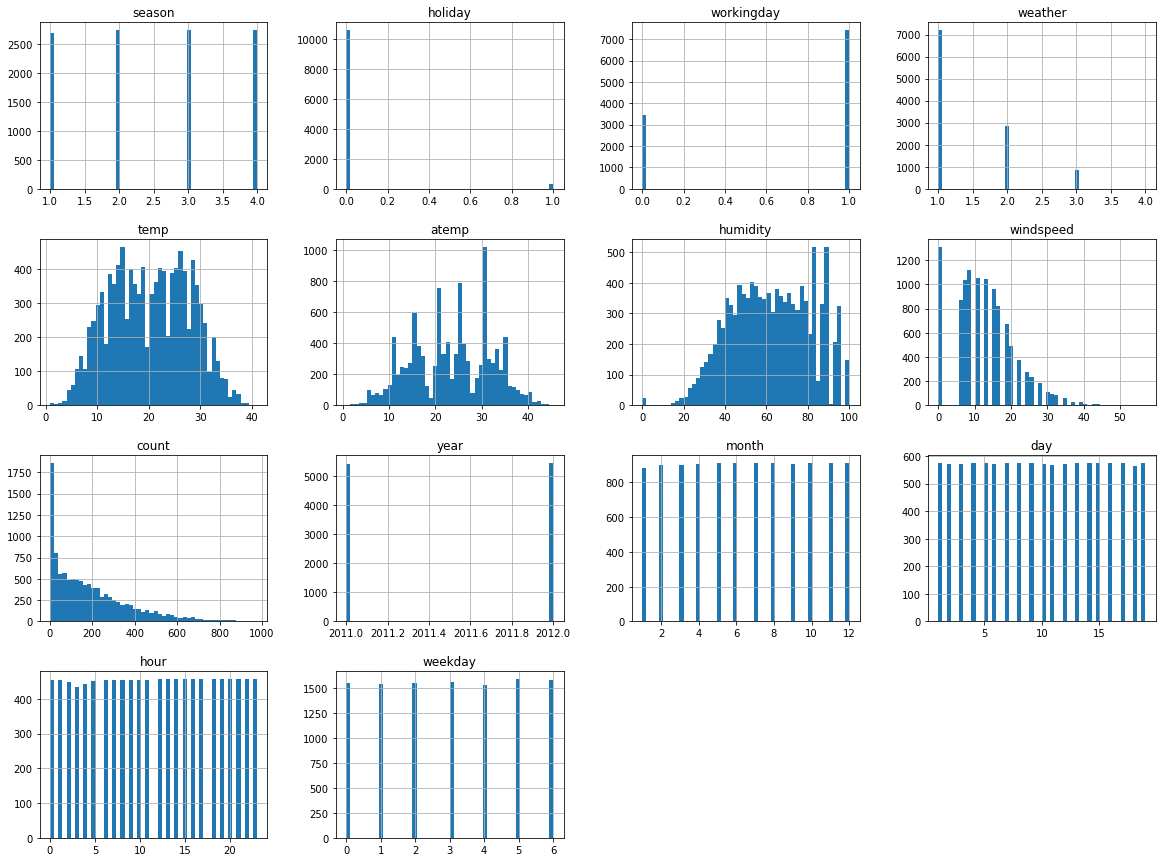

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

At first glance we can see our categorical data such as:
Season, holiday, workingday, weather

For categories with more than 2 values I will use the idea in one hot encoding.

I will also not touch the categories I created

1.We can see that count has more values under 200.

2.Temp has a bell curve like distribution.

### Correlations Inside Our Data

In [11]:
correlation_matrix = train.corr()

In [12]:
correlation_matrix["count"].sort_values(ascending=False)

count         1.000000
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
weekday      -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

Correlation coefficent ranges from 1 to -1. If it is closer to 1 values have positive correlation if it is closer to -1 values have negative correlation.

We can see that hour and temp have positive correlation with count. But humidity and weather have negative correlation with count

In [13]:
train["hour_temp"] = train["hour"] * train["temp"]
train["humidty_temp"] = train["humidity"] / train["temp"]

In [14]:
correlation_matrix = train.corr()
correlation_matrix["count"].sort_values(ascending=False)

count           1.000000
hour_temp       0.539515
hour            0.400601
temp            0.394454
atemp           0.389784
year            0.260403
month           0.166862
season          0.163439
windspeed       0.101369
day             0.019826
workingday      0.011594
weekday        -0.002283
holiday        -0.005393
weather        -0.128655
humidity       -0.317371
humidty_temp   -0.374143
Name: count, dtype: float64

### Lets See Correlated Values

array([[<AxesSubplot:xlabel='count', ylabel='count'>,
        <AxesSubplot:xlabel='hour_temp', ylabel='count'>,
        <AxesSubplot:xlabel='humidty_temp', ylabel='count'>],
       [<AxesSubplot:xlabel='count', ylabel='hour_temp'>,
        <AxesSubplot:xlabel='hour_temp', ylabel='hour_temp'>,
        <AxesSubplot:xlabel='humidty_temp', ylabel='hour_temp'>],
       [<AxesSubplot:xlabel='count', ylabel='humidty_temp'>,
        <AxesSubplot:xlabel='hour_temp', ylabel='humidty_temp'>,
        <AxesSubplot:xlabel='humidty_temp', ylabel='humidty_temp'>]],
      dtype=object)

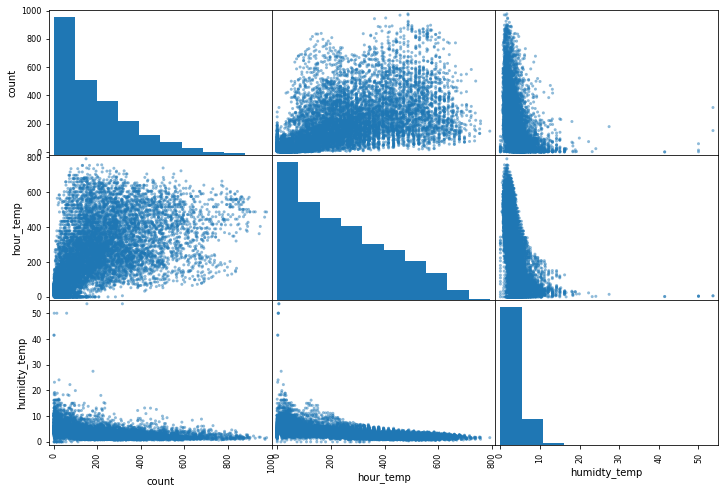

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["count", "hour_temp", "humidty_temp"]
scatter_matrix(train[attributes], figsize=(12, 8))

### Encode and Scale

In [16]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
attributes = ["season","weather"]
encoded_values = hot_encoder.fit_transform(train[attributes])


In [17]:
encoded_df = pd.DataFrame(encoded_values.toarray(), columns=['season1', 'season2', 'season3', 'season4',
                                                'weather1', 'weather2', 'weather3', 'weather4'])

train = pd.concat([train, encoded_df],axis=1).drop(["season","weather"], axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
attributes = train.columns.drop(['count'])
train[attributes] = scaler.fit_transform(train[attributes])

In [20]:
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,...,hour_temp,humidty_temp,season1,season2,season3,season4,weather1,weather2,weather3,weather4
0,-0.17149,-1.460672,-1.333661,-1.092737,0.993213,-1.567754,16,-1.003866,-1.603121,-1.64207,...,-1.333586,1.719063,1.747245,-0.578977,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
1,-0.17149,-1.460672,-1.438907,-1.182421,0.941249,-1.567754,40,-1.003866,-1.603121,-1.64207,...,-1.283742,1.964372,1.747245,-0.578977,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
2,-0.17149,-1.460672,-1.438907,-1.182421,0.941249,-1.567754,32,-1.003866,-1.603121,-1.64207,...,-1.233898,1.964372,1.747245,-0.578977,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
3,-0.17149,-1.460672,-1.333661,-1.092737,0.681430,-1.567754,13,-1.003866,-1.603121,-1.64207,...,-1.170460,1.484420,1.747245,-0.578977,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585
4,-0.17149,-1.460672,-1.333661,-1.092737,0.681430,-1.567754,1,-1.003866,-1.603121,-1.64207,...,-1.116085,1.484420,1.747245,-0.578977,-0.578977,-0.579118,0.716677,-0.593264,-0.292692,-0.009585


### Creating Models

In [57]:
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor()
bagging_reg.fit(train[attributes], train["count"])

BaggingRegressor()

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train[attributes], train["count"])

DecisionTreeRegressor()

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train[attributes], train["count"])

RandomForestRegressor()

In [49]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_reg = KNeighborsRegressor()
kneighbor_reg.fit(train[attributes], train["count"])

KNeighborsRegressor()

### Comparing Models

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bagging_reg, train[attributes], train["count"],scoring="neg_mean_squared_log_error", cv=10)
print("Bagging Regression Score: ", -scores.mean())

Bagging Regression Score:  0.21958865721826698


In [60]:
scores = cross_val_score(tree_reg, train[attributes], train["count"],scoring="neg_mean_squared_log_error", cv=10)
print("Decision Tree Regression Score: ", -scores.mean())

Decision Tree Regression Score:  0.302709149941779


In [61]:
scores = cross_val_score(forest_reg, train[attributes], train["count"],scoring="neg_mean_squared_log_error", cv=10)
print("Random Forest Regression Score: ", -scores.mean())

Random Forest Regression Score:  0.20650484171042752


In [62]:
scores = cross_val_score(kneighbor_reg, train[attributes], train["count"],scoring="neg_mean_squared_log_error", cv=10)
print("KNeighbors Regression Score: ", -scores.mean())

KNeighbors Regression Score:  1.1453858349143817


### Finding Hyperparameters

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error',
                           return_train_score=True)
grid_search.fit(train[attributes], train["count"])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_log_error')

## Now Time To Prepare Test Data

In [36]:
test = pd.read_csv("test.csv")
submission_time = test.datetime

### Change Attributes According To Training

In [37]:
# Object to datetime, datetime to year, month, day, hour and weekday
time_extraction(test)

In [38]:
# Creating new attributes
test["hour_temp"] = test["hour"] * test["temp"]
test["humidty_temp"] = test["humidity"] / test["temp"]

### Encode And Scale Part 2

In [39]:
attributes = ["season","weather"]
encoded_values = hot_encoder.transform(test[attributes])

In [40]:
encoded_df = pd.DataFrame(encoded_values.toarray(), columns=['season1', 'season2', 'season3', 'season4',
                                                'weather1', 'weather2', 'weather3', 'weather4'])

test = pd.concat([test, encoded_df],axis=1).drop(["season","weather"], axis=1)

In [41]:
test = scaler.transform(test)

### Using Best Model To Predict

In [47]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test)

### Create Submission File

In [48]:
submission = pd.DataFrame({ "datetime": submission_time, "count": final_predictions})
submission.to_csv('random_Forest_log.csv',index=False)